## By  Pavan kumar C N  inetrn @The Spark Foundations
### Github --- https://github.com/pavankumarcn66
### Linkedin --- https://www.linkedin.com/in/pavan-kumar-c-n-375498205/

# <font color='green'> Exploratory Data Analysis - Retail</font>


## <font color='brown'> Task Highlights :>>>> </font>

# Perform Exploratory Data Analysis (EDA) on ‘||SampleSuperstore||’ data

### <font color='black'>As a business manager, find the weak areas to work to make more profit </font>


Derive business problems by exploring the data

The main problems to be solved by this data science and business analytics task have been properly framed, in terms of client's goals, background information, and purpose of task. This ensures that the task is understood and explored to better inform the decision-making process on the possible range of approaches and solutions to the problems.

This task will extract relevant, representative, and sufficient case study data from a reputable and reliable online source. Appropriate preprocessing adjustments and data exploration will be performed on the data to ensure reliable and reasonable outcomes and outputs. All significant interpretations and observations will be noted and considered for future improvements.

Following the purpose of this task, the primary focus will be on profit-related factors, which are the attributes 'Sales' and 'Profit' in American Dollars (USD$) measurements, as well as the integer value of 'Quantity' and percentage values of 'Discount' for each sales transaction. Analysing these will help to identify and assess concern areas.

Note that throughout this task, the important points are differentiated using the Indented Quotes format.

In [14]:
# import necessary libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display # Support for interactive data visualization and use of GUI toolkits
%matplotlib inline

## Data Collection

The first step of a data science and business analytics task is to obtain, gather, and measure the necessary and targeted data from available internal or external data sources, and then compiled into an established system. In this case, Sample Superstore dataset is used.

In [16]:
df=pd.read_csv("C:/Users/Pavan kumar C N/Downloads/SampleSuperstore.csv")
df.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [19]:
# return the object type, which is dataframe
type(df)

pandas.core.frame.DataFrame

 The dataframe format type will facilitate the use of a wider variety of syntax and methods for data analysis, including describe() and info().
 Regarding the attributes included in SampleSuperstore dataset, 'Ship Mode' is the method of shipping the physical goods and products to the intended customers, 'Segment' specifies the customer segment or marketing groups according to their interests and demographics, 'Country' is all in the United States of America (USA), 'City' refers to the cities in USA, 'State' is made up of the states in USA, 'Postal Code' denotes the postal destination address sorted by the regions in USA, 'Region' indicates the geographic position in the USA continent, 'Category' consists of the named groups of similar and defined physical products, 'Sub-Category' lists the subdivisions with respect to a given category, 'Sales' are the monetary value of transactions between the Superstore and its customers of physical 
goods in American Dollars (USD) measurements, 'Quantity' records the number of such products in each sales transaction, 'Discount' states the percentage of monetary deduction from the usual product price, and 'Profit' is the financial gains in USD from each sales transaction.

## Data Preprocessing

Data preprocessing is a data mining technique that transforms raw data into an understandable format. This process has four main stages – data cleaning, data integration, data transformation, and data reduction.

Data cleaning will filter, detect, and handle dirty data to ensure quality data and quality analysis results. In this case, there may be noises of impossible and extreme values and outliers, and missing values. The errors may include inconsistent data and redundant attributes and data.

As the first step, null values within the dataset will be identified, and appropriately replaced if possible.

In [20]:
# display the number of entries, the number and names of the column attributes, the data type and
    # digit placings, and the memory space used
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


The dataset contains 9994 rows of records and 13 columns of attributes. The data types of the attributes consist of 8 qualitative discrete categorical, 2 quantitative discrete numerical integer, and 3 quantitative continuous numerical float with 64 digit placings.

The memory space usage is at least 1015 kilobytes (KB).

Through this, it is found that there are no null values present in the dataset.

For the next step, unique() is used to check qualitative data for noises of impossible values such as incorrect mispelt data entries, or errors of inconsistent data such as not comparable numerical measurement formats and data types.

In [21]:
# display unique categories for qualitative attributes
catagorical_features = [i for i in df.columns if df.dtypes[i] == 'object']
for j in catagorical_features:
    print(j)
    print(sorted(df[j].unique())) # sort in alphabetical order

Ship Mode
['First Class', 'Same Day', 'Second Class', 'Standard Class']
Segment
['Consumer', 'Corporate', 'Home Office']
Country
['United States']
City
['Aberdeen', 'Abilene', 'Akron', 'Albuquerque', 'Alexandria', 'Allen', 'Allentown', 'Altoona', 'Amarillo', 'Anaheim', 'Andover', 'Ann Arbor', 'Antioch', 'Apopka', 'Apple Valley', 'Appleton', 'Arlington', 'Arlington Heights', 'Arvada', 'Asheville', 'Athens', 'Atlanta', 'Atlantic City', 'Auburn', 'Aurora', 'Austin', 'Avondale', 'Bakersfield', 'Baltimore', 'Bangor', 'Bartlett', 'Bayonne', 'Baytown', 'Beaumont', 'Bedford', 'Belleville', 'Bellevue', 'Bellingham', 'Bethlehem', 'Beverly', 'Billings', 'Bloomington', 'Boca Raton', 'Boise', 'Bolingbrook', 'Bossier City', 'Bowling Green', 'Boynton Beach', 'Bozeman', 'Brentwood', 'Bridgeton', 'Bristol', 'Broken Arrow', 'Broomfield', 'Brownsville', 'Bryan', 'Buffalo', 'Buffalo Grove', 'Bullhead City', 'Burbank', 'Burlington', 'Caldwell', 'Camarillo', 'Cambridge', 'Canton', 'Carlsbad', 'Carol Stream'

Through this, it is found that there are no noises of impossible values or errors of inconsistent values.

In relation to the unique values, their count can be computed.

In [22]:
# count of unique values
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

The Winsorisation method is popularly chosen to handle numerical outliers, where outlier values are replaced with the minimum or maximum non-outlier value identified using the interquartile range (IQR) method. The acceptable value range to not be considered an outlier is [Q1-1.5IQR, Q3+1.5IQR], where Q1 is the first quartile of 25 percentile, Q3 is the third quartile of 75 percentile, and IQR is (Q3 – Q1).

In addition, impossible and extreme numerical values can be assumed as incorrect data entries, where they are identified as differing from the mean attribute value by a comparatively large margin.

In this case, no values were considered as outliers or impossible and extreme values, since all numerical values are reasonable and within an expected range in relation to the Superstore case study.

Duplicated rows or records can now by dropped from the dataset, as this redundancy may cause inaccurate results and outcomes (an assumption on the dataset).

In [23]:
# detect duplicated records
df[df.duplicated(subset = None, keep = False)]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
568,Standard Class,Corporate,United States,Seattle,Washington,98105,West,Office Supplies,Paper,19.440,3,0.0,9.3312
591,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
935,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
1186,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
1479,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416
2803,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
2807,Second Class,Consumer,United States,Seattle,Washington,98115,West,Office Supplies,Paper,12.960,2,0.0,6.2208
2836,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
3127,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864


In [24]:
# drop duplicated records, retain only one copy for each
df = pd.DataFrame.drop_duplicates(df)
df.shape
# 9977 unique records for 12 attributes

(9977, 13)

Data integration is not needed, since only one dataset is used with no schema integrations, and thus no discernable entity identification issues or data value conflicts.

Data transformation will check overall range of values for the entire dataset. All values should fall under an acceptable small range to allow easy visualisations and modelling. However, Sample Superstore's data will not be transformed or scaled for this EDA task.

Data reduction involves dropping the attribute ‘Country’ through attribute dimensionality reduction, since it is redundant with 100% exact same values of "United States" for all records. 'Postal Code' is also dropped since this attribute is less important towards the profit-centric task.

In [25]:
# drop Country
df = df.drop(['Country'], axis = 1)

In [26]:
# drop Postal Code
df = df.drop(['Postal Code'], axis = 1)

A correlation heatmap is used to list all the correlation coefficients in order to identify multicollinearity, in other words high intercorrelation above an absolute value of 0.5 between the a pair of attributes. For a pair of attributes with multicollinearity, one of them will be dropped since it would be redudant to include both of them with almost mirroring values. Another reason is to prevent overfitting.

The correlation will compare and describe the linear connection and relationship between pairs of features, through the type of correlation and its strength. A positive correlation indicates that both features will change their values in the same direction, while a negative correlation indicates that both will change in opposite directions. The larger the correlation strength, the stronger the connection and relationship.

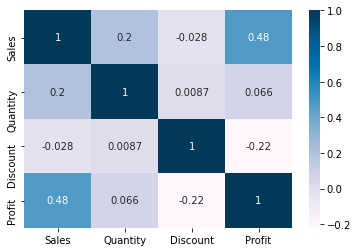

In [29]:
# compare linear relationships between attributes using correlation coefficient generated using
    # correlation matrix
sns.heatmap(df.corr(), cmap = 'PuBu', annot = True) # cmap=colomap, annot – an array of the same shape as data which is used to annotate the heatmap.
plt.show()

in this case, the only predictors that are considered to be dropped will be if their intercorrelations are above 0.95 and thus almost perfect descriptions of each other. It would be redundant to include both of them. Therefore, no attributes were removed as to not lose relevant information and degrade the overall EDA process.

The final dataset information is summarised below.

In [30]:
# display the number of entries, the number and names of the column attributes, the data type and
    # digit placings, and the memory space used
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   City          9977 non-null   object 
 3   State         9977 non-null   object 
 4   Region        9977 non-null   object 
 5   Category      9977 non-null   object 
 6   Sub-Category  9977 non-null   object 
 7   Sales         9977 non-null   float64
 8   Quantity      9977 non-null   int64  
 9   Discount      9977 non-null   float64
 10  Profit        9977 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 935.3+ KB


The dataset contains 9977 rows of records and 11 columns of attributes. The data types of the attributes consist of 7 qualitative discrete categorical, 1 quantitative discrete numerical integer, and 3 quantitative continuous numerical float with 64 digit placings.

The memory space usage is at least 935 KBs.

Data pre-processing is now complete.

Exploratory Data Analysis (EDA)
EDA aims to perform initial investigations on data before formal modeling and graphical representations and visualisations, in order to discover patterns, look over assumptions, and test hypothesis. The summarised information on main characteristics and hidden trends in data can help the Superstore to identify concern areas and problems, and the resolution of these can boost their profits.

First, the summary statistics will be considered.

In [31]:
# summary statistics of the attributes, including measures of central tendency and 
    # measures of dispersion
df.describe()

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


In [32]:
# total Sales
round(sum(df['Sales']), 2)



2296195.59

In [33]:
# total Quantity sold
sum(df['Quantity'])

37820

In [34]:
# total Profit
round(sum(df['Profit']), 2)

286241.42

Total sales value was USD$2296195.59, and USD\$230.15 on average for  each  transaction. This can range from USD$0.44 to a highest sales value of USD\$22,638.48 for an individual transaction. The higher amounts were likely placed by Corporate or Home Office customer segments for larger quantities of products.

Total quantity sold was 37,820, and 4 on average for each transaction. This can range from 1 to a highest quantity of 14 products for an individual transaction. The higher quantities were likely placed by Corporate or Home Office customer segments.

Average discount was 16% for each transaction. This can range from no discount to a notable highest discount of 80% for an individual transaction. The higher discounts were likely from festivals, end-of-season sales, and clearance sales for stocks that are of older fashion.

Overall, the Superstore made a considerably good profit of USD$28,6241.42, and USD\$28.69 on average for each transaction. However, this can range from a loss of USD$6,599.98 to a profit of USD\$8,399.98 for an individual transaction. Higher discounts likely played a major role in the more signifant losses.

Diving deeper into sales and profit data, these are compared through density plotting to visualise data frequency for overall data distribution. Analysis is mostly focused on the relationship between these.

matplotlib.pyplot graphics library is imported for the visualisations of figures. It is convenient as it has good reproducibility of scientific figures, for example when regenerating a figure using updated data, appearance, latex labels and texts, and aspects such as orientation. %matplotlib inline is used to configure the output of the figures to be embedded in the Jupyter notebook file, instead of opening a new window each time.

Data visualisation will include suitable graphs that are descriptive and comparative to effectively communicate both abstract and concrete ideas. Histogram density plots are chosen to illustrate the overall data distribution, as well as the data distributions of Sales and Profit. Seaborn is used for a terser Application Programming Interface (API).

Kernel density estimate (KDE) plots, using the kde() method, will visualise the overall distribution through a continuous probability density curve. This generates two histogram density plots and their continuous probability density curves for Sales and Profit in the same figure space, and clearly differentiates them by specifying different colours in its parameters. The xlim() method restricts plot range to 0 and above for meaningful visualisations, since it is impossible for Sales to have a negative value and more interest is placed on Profits in this case study.

C:\Users\Pavan kumar C N\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\Pavan kumar C N\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


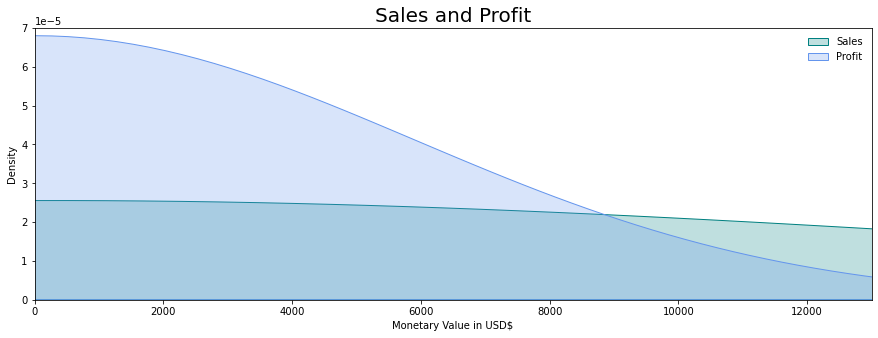

In [35]:
plt.figure(figsize = (15, 5))
# plot Sales and Profit for comparisons
sns.kdeplot(df['Sales'], color = 'Teal', label = 'Sales', shade = True, bw = 25)
sns.kdeplot(df['Profit'], color = 'Cornflowerblue', label = 'Profit', shade = True, bw = 25)
plt.xlim([0, 13000])
plt.ylim([0, 0.00007])
plt.ylabel('Density')
plt.xlabel('Monetary Value in USD$')
plt.title('Sales and Profit', fontsize = 20)
plt.legend(loc = 'upper right', frameon = False) 
plt.show()

C:\Users\Pavan kumar C N\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\Pavan kumar C N\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


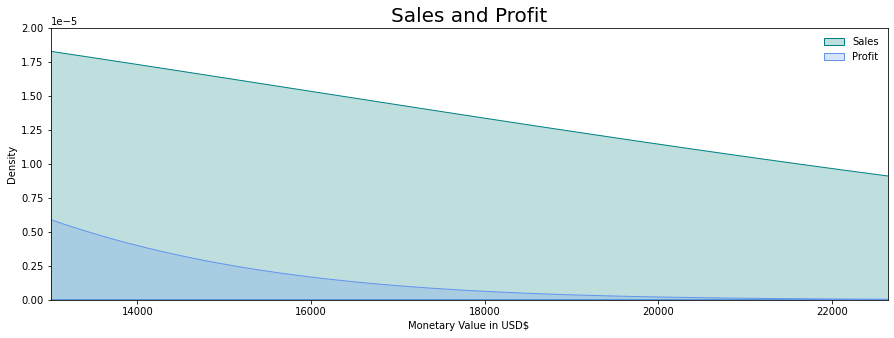

In [36]:
plt.figure(figsize = (15, 5))
# plot Sales and Profit for comparisons
sns.kdeplot(df['Sales'], color = 'Teal', label = 'Sales', shade = True, bw = 25)
sns.kdeplot(df['Profit'], color = 'Cornflowerblue', label = 'Profit', shade = True, bw = 25)
plt.xlim([13000, 22640])
plt.ylim([0, 0.00002])
plt.ylabel('Density')
plt.xlabel('Monetary Value in USD$')
plt.title('Sales and Profit', fontsize = 20)
plt.legend(loc = 'upper right', frameon = False) 
plt.show()

Profits are mostly above sales, indicating good business. However, there are some instances where profits can be improved, such as at the USD$9,000 sales mark onwards.

The histogram density plots' highest points in the curves show the pattern of more sales transactions with less than USD$1k monetary value, and the highest profit is gained when the value is less than USD\$500.

For quantitative attributes, their linear relationships and their strengths can be compared using a correlation heatmap.

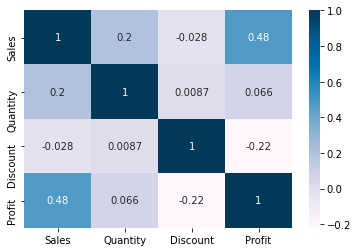

In [37]:
# compare linear relationships between attributes using correlation coefficient generated using
    # correlation matrix
sns.heatmap(df.corr(), cmap = 'PuBu', annot = True)
plt.show()

Sales and Profit have a moderate positive linear correlation. When Sales increase by USD$1, Profit will increase by USD\$0.48. This is indicative that this Superstore is a popular company with constant demand of the products sold, and the management may have a good ability in managing costs to ensure high profit margins.

Discount and Profit have a weak negative linear correlation. When Discount increase by 1%, Profit will decrease by USD$0.22. This is because discount deductions will reduce overall sales revenues.

Quantity and Profit have little to no linear correlation. This is indicative that the Superstore may sell a considerable number of products at low profit margins, with promotional strategies such as higher discounts on larger quantities of products in a single transaction, and Buy One Get One Free (BOGOF) promotions. As a result, average profit is lower. Another likely explanation is that Profit will increase as Quantity increases, but not on a linear scale.

Discount and Sales have little to no linear correlation. This is indicative that despite targeting to implement discounts as a promotional strategy to successfully increase sales, Superstore encouraged bad consumer psychology instead. A considerable number of customers may develop the thinking that Superstore's products are defective or low quality, according to the lowered prices after discount deductions. In a long run, this can negatively affect Superstore's brand image. Superstore is advised to consider other promotional strategies.

Discount and Quantity have little to no linear correlation. This is indicative that implementing discounts as Superstore's promotional strategy is not attractive or motivating. As discussed in the previous point, this may result in bad consumer psychology. Superstore is advised to consider other promotional strategies, as identified according to customer's preferences through market researches and surveys.

Quantity and Sales have a weak positive linear correlation. When Quantity increase by 1 unit, Sales will increase by USD$0.20. However, it is more likely that they have a positive non-linear relationship.

Taking a closer look at the individual categories of important qualitative attributes, as well as their frequency of occurences :

C:\Users\Pavan kumar C N\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pavan kumar C N\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pavan kumar C N\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C

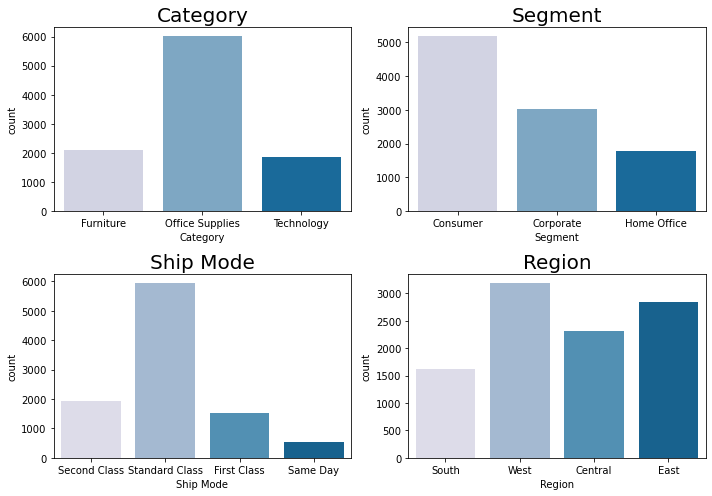

In [38]:
# count of each Category, Segment, Ship Mode, and Region
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(10, 7));
sns.countplot(df['Category'], ax = axs[0][0], palette = 'PuBu')
sns.countplot(df['Segment'], ax = axs[0][1], palette = 'PuBu')
sns.countplot(df['Ship Mode'], ax = axs[1][0], palette = 'PuBu')
sns.countplot(df['Region'], ax = axs[1][1], palette = 'PuBu')
axs[0][0].set_title('Category', fontsize = 20)
axs[0][1].set_title('Segment', fontsize = 20)
axs[1][0].set_title('Ship Mode', fontsize = 20)
axs[1][1].set_title('Region', fontsize = 20)
plt.tight_layout()

There are 3 categories of 'Category', where “Furniture” has over 2k instances, “Office Supplies” is notably most popular with around 6k, and “Technology” has almost 2k. This clearly illustrates that data available for "Office Supplies" has almost 3 times the proportion than that for the other two categories, which will be taken note of for further data visualisations and analysis later on.

There are 3 categories of 'Segment', where “Consumer” is notably most common with over 5k instances, “Corporate” has over 3k, and “Home Office” has around 2k. This clearly illustrates that data available for "Consumer" is the sum of that of other two categories, which will be taken note of for further data visualisations and analysis later on.

There are 4 categories of 'Ship Mode', where “Standard Class” is notably most preferred with almost 6k instances, “Second Class” has almost 2k, "First Class" has over 1.5k, and “Same Day” has around 500. This clearly illustrates that data available for "Standard Class" has almost 3 times the proportion than that for "Second Class" and "First Class" categories, and 12 times that for "Same Day". This will be taken note of for further data visualisations and analysis later on.

There are 4 categories of 'Region', where “West” is the highest with over 3k instances, “East” is a close second at around 2.75k, "Central" has over 2.25k, and “South” has over 1.5. This clearly illustrates that data available for all 4 categories are differing, and this will be taken note of for further data visualisations and analysis later on.

Moving on, scatter plot allows detailed observation of the overall spread and relationships between Sales and Profit for all transactions.

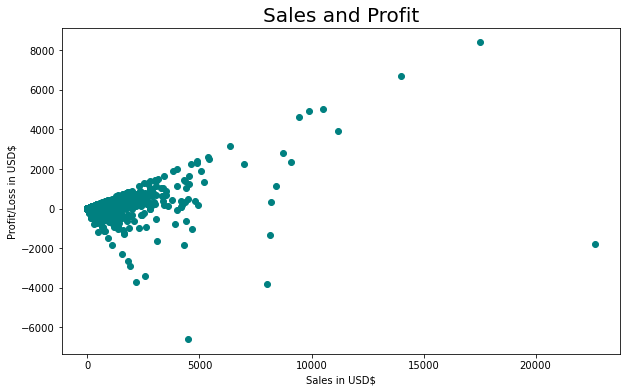

In [39]:
fig, ax = plt.subplots(figsize = (10, 6))
# scatterplot of Sales and Profit
ax.scatter(df["Sales"] , df["Profit"], color = 'Teal')
ax.set_xlabel('Sales in USD$')
ax.set_ylabel('Profit/Loss in USD$')
plt.title('Sales and Profit', fontsize = 20)
plt.show()

Most sales are less than USD$5k. This is likely because a majority of the Superstore's customers are of the Consumer Segment - individuals who tend to buy and spend less than the other customer Segments comprising of groups and teams from Corporates and Home Offices.

A significant number of transactions under USD$2.5k result in a loss. One likely reason behind smaller transaction amounts is after accounting for higher discount deductions, where this will decrease overall profits and can even cause a loss.

Larger sales above USD$2.5k are very likely to result in a profit. Profit margins may be higher, after economies of scale in cost components such as procurement, packaging, and delivery.

A state-wise analysis is carried out below.

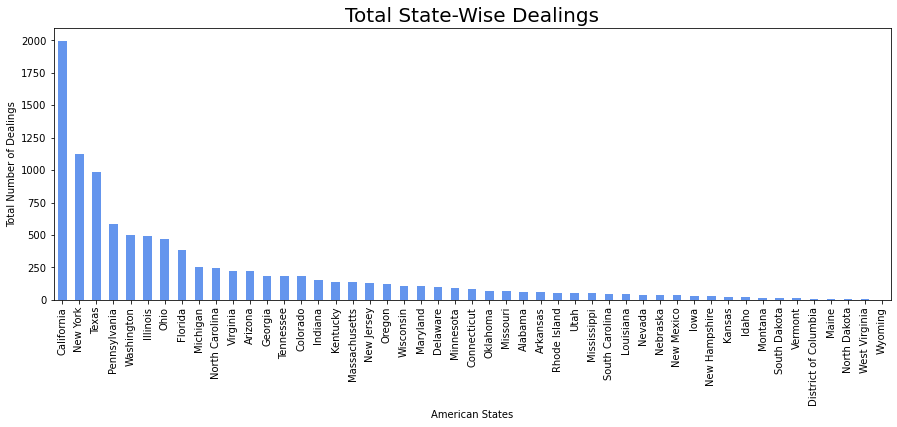

In [40]:
# total dealings for each State
df_state_dealings = df.groupby('State')['Quantity'].count().sort_values(ascending = False).plot.bar(figsize = (15, 5), 
                                                                                                    color = 'Cornflowerblue')
plt.ylabel('Total Number of Dealings')
plt.xlabel('American States')
plt.title('Total State-Wise Dealings', fontsize = 20)
plt.show()

Superstore has the notable highest dealings in the state of California, with almost 2K of total dealings.

With a big trailing gap, New York has the second highest dealings, with around 1,125 of total dealings.

Texas is third with almost 1K of total dealings.

The states of District of Columbia, Maine, North Dakota, West Virginia, and Wyoming have comparatively negligible dealings. Even if the Superstore outlets here are newly opened, marketing strategies should be improved in these areas as well as the states with less than 100 total dealings.

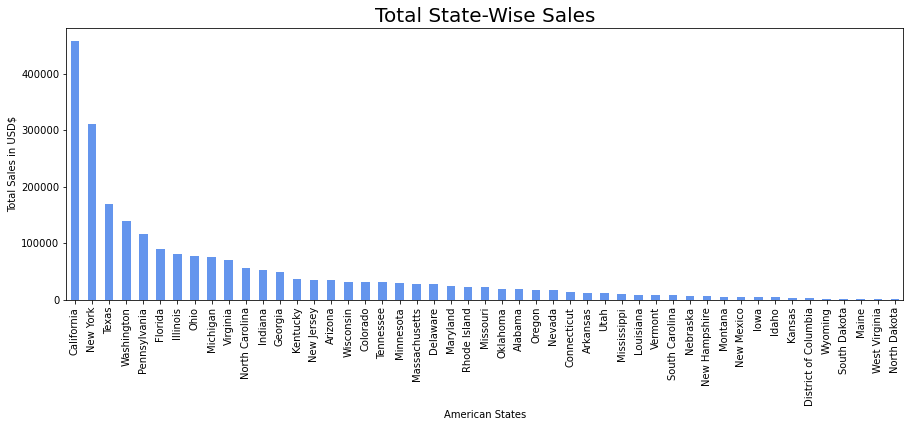

In [41]:
# total Sales for each State
df_state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending = False).plot.bar(figsize = (15, 5), 
                                                                                            color = 'Cornflowerblue')
plt.ylabel('Total Sales in USD$')
plt.xlabel('American States')
plt.title('Total State-Wise Sales', fontsize = 20)
plt.show()

The top 3 states here is same as for the previous analysis on number of dealings.

Superstore has a notable highest sales in the state of California, with over USD$450K of total sales.

With a big trailing gap, New York has the second highest sales, with over USD$300k of total sales.

With another big trailing gap, Texas is third with around USD$170K of total sales.

The states of Wyoming, South Dakota, Maine, West Virginia, and North Dakota have comparatively negligible sales. Even if the Superstore outlets here are newly opened, marketing strategies should be improved in these areas as well as the states with less than USD$20k total sales.







An analysis on state-wise profit/loss and the effect of discount on this is presented below.

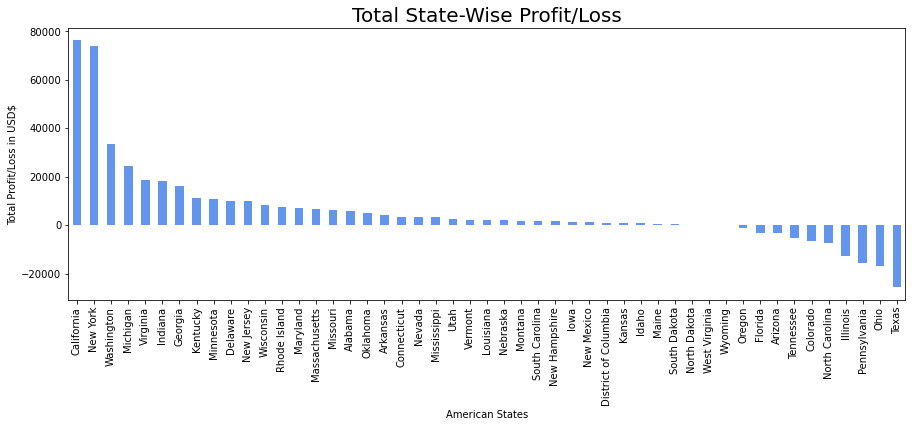

In [42]:
# total Profit for each State
df_state_profit = df.groupby('State')['Profit'].sum().sort_values(ascending = False).plot.bar(figsize = (15, 5), 
                                                                                              color = 'Cornflowerblue')
plt.ylabel('Total Profit/Loss in USD$')
plt.xlabel('American States')
plt.title('Total State-Wise Profit/Loss', fontsize = 20)
plt.show()

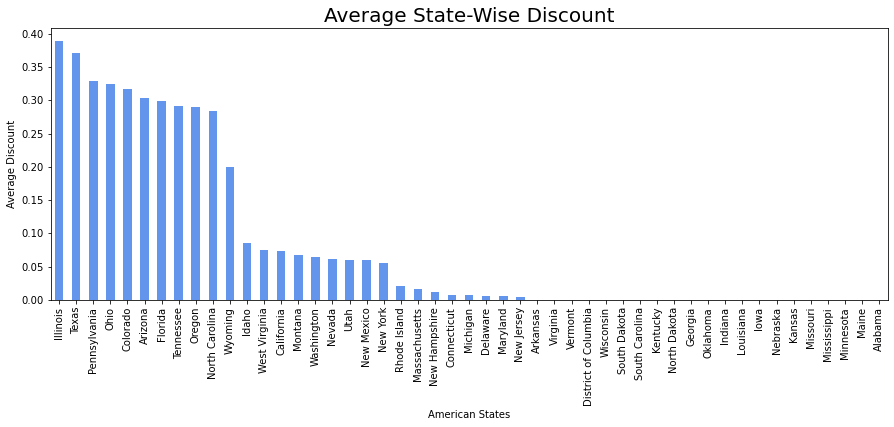

In [43]:
# average Discount for each State
df_state_profit = df.groupby('State')['Discount'].mean().sort_values(ascending = False).plot.bar(figsize = (15, 5), 
                                                                                                 color = 'Cornflowerblue')
plt.ylabel('Average Discount')
plt.xlabel('American States')
plt.title('Average State-Wise Discount', fontsize = 20)
plt.show()

California and New York retained their top 2 places, with the notably higher total profits of around USD$75k.

With a big trailing gap, Washington is third with around USD$35k of total profits.

Texas, despite having the third highest dealings and sales, suffered the highest loss of around USD$25k. This may be due to it having the second highest discount level. Superstore is advised to reduce discount levels in Texas, and instead switch to other promotional strategies, in order to minimise losses.

Pennsylvania, Illinois, and Ohio are the third, first, and fourth state offering larger discounts respectively, and this may be the reason behind them resulting in the third, fourth, and second biggest loss of around USD$15k. As in the previous point, Superstore is advised to switch to a different promotional strategy.

California gives out considerably lower discounts, which may be one of the main reasons behind it being top in sales and profits by a significant margin. This is indicative that the promotional strategy of offering slight discounts is highly effective in the state of California.

More than half the states make little to no profit, and a significant number of these even suffer from a notable loss.

A majority of states offer slight discounts under 10%.

Diving deeper into the profits and losses from state-wise sales, a sample of 6 states are chosen based on the categories of high profit, medium profit, low profit, low loss, medium loss, and high loss. Crucial trends are identified, starting from the collection of answers to the following targeted questions.

Which products are popular in profit-making states?

Which products are commonly purchased in loss-bearing states?

Which product categories and sub-categories can be improved in order to increase profits?

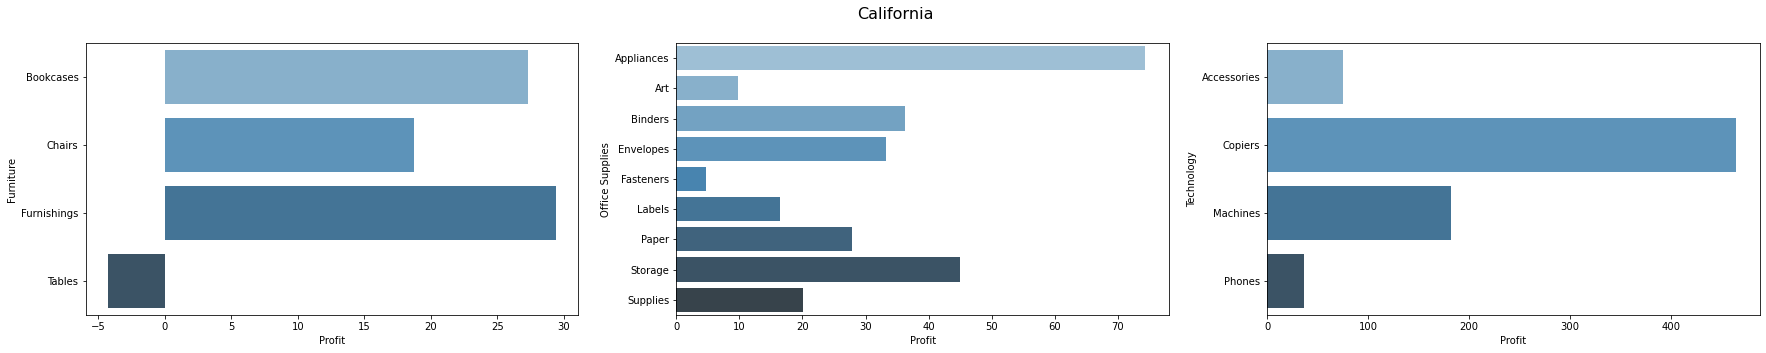

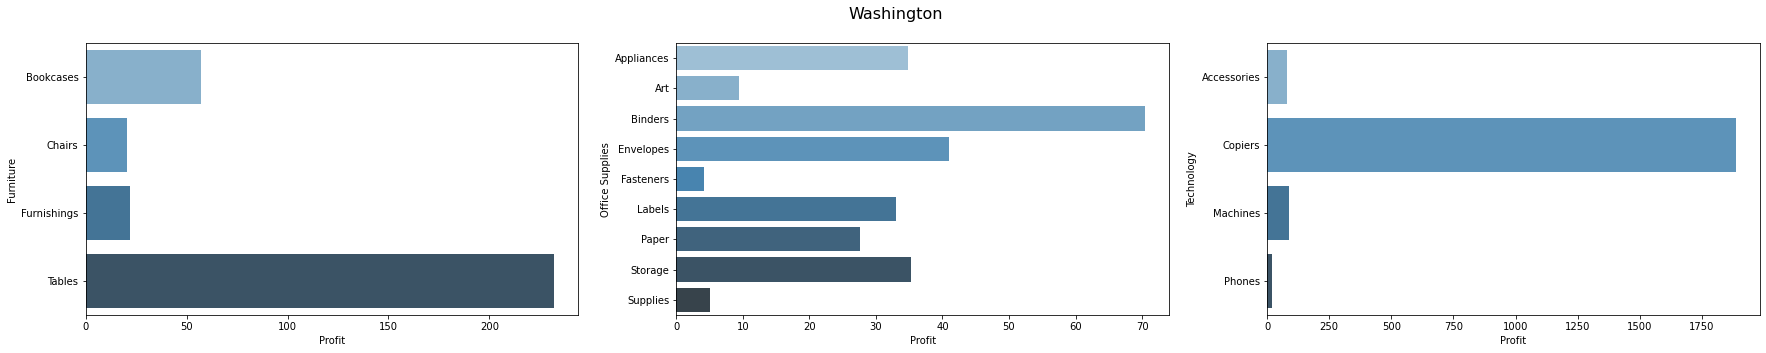

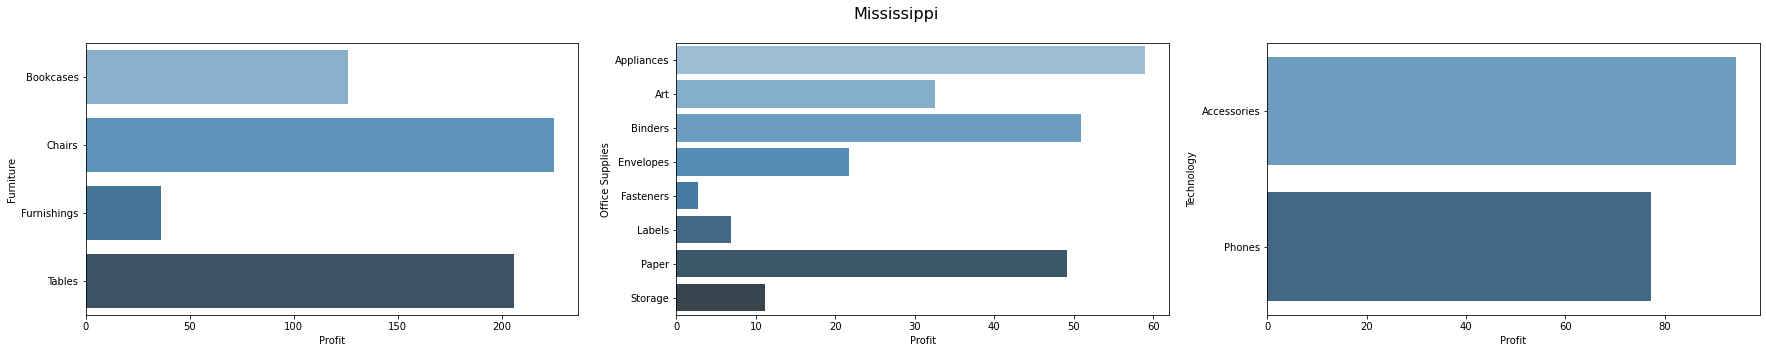

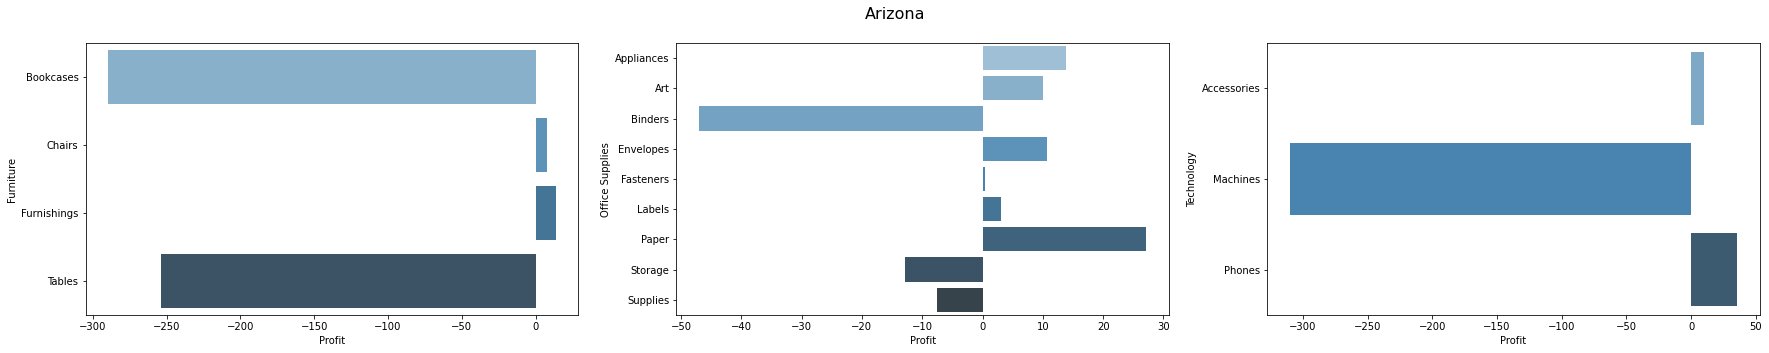

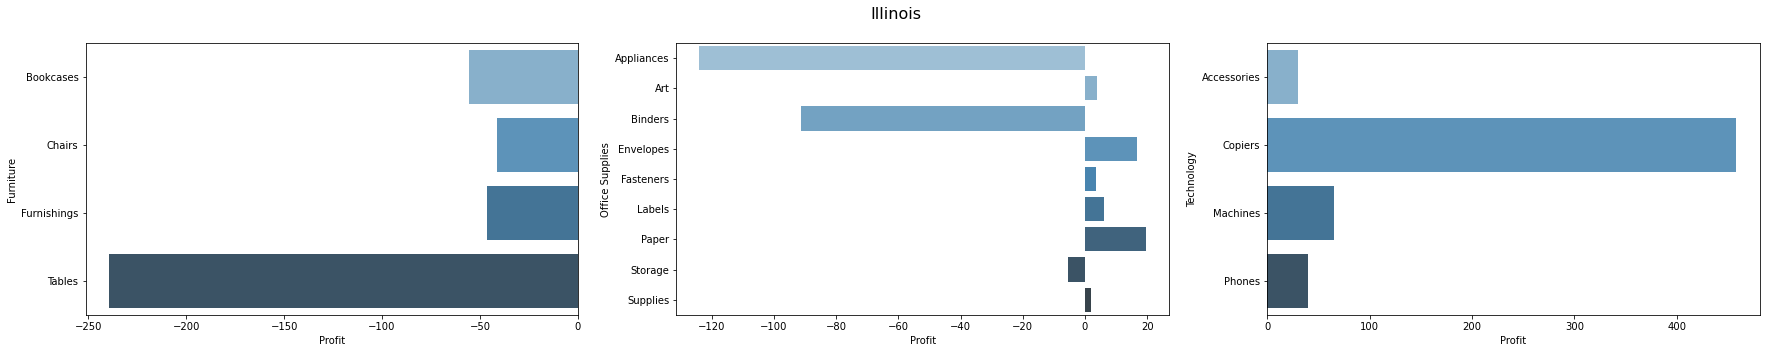

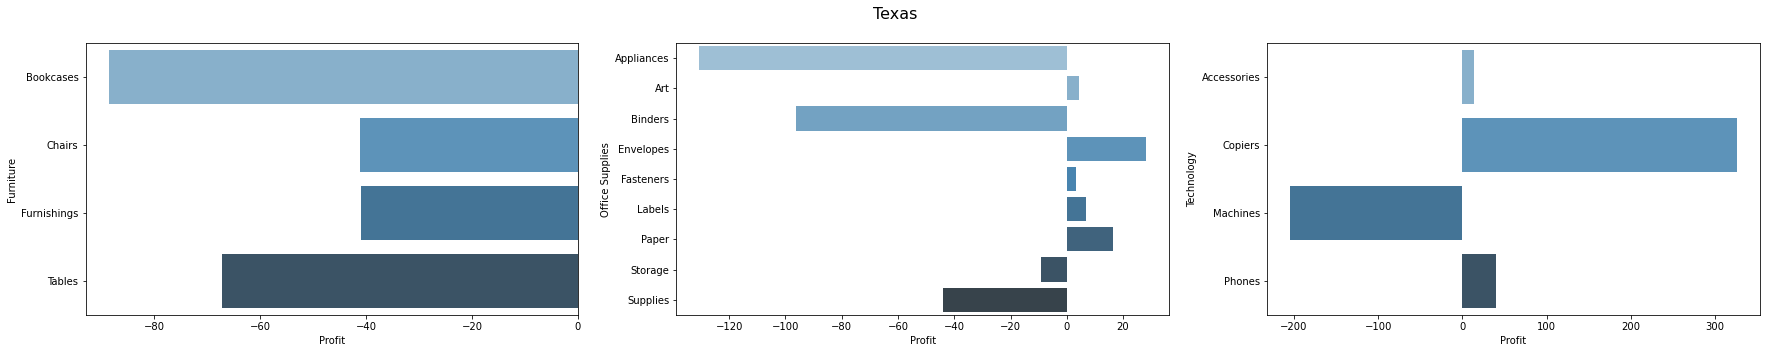

In [49]:
def state_data_viewer(states):
# plot profit of product categories and sub-categories for the chosen states
    product_data = df.groupby(['State'])
    for state in states:
        data = product_data.get_group(state).groupby(['Category'])
        fig, ax = plt.subplots(1, 3, figsize = (30, 5))
        fig.suptitle(state, fontsize = 16)        
        ax_index = 0
        # plot a chart for each category
        for category in ['Furniture', 'Office Supplies', 'Technology']:
            # plot sub-categories in each category
            category_data = data.get_group(category).groupby(['Sub-Category']).mean()
            sns.barplot(x = category_data.Profit, y = category_data.index, 
                        ax = ax[ax_index], palette = 'Blues_d')
            ax[ax_index].set_ylabel(category)
            ax_index += 1
# chosen States based on profit/loss categories
states = ['California', 'Washington', 'Mississippi', 'Arizona', 'Illinois', 'Texas']
state_data_viewer(states)

In high profit states such as California, all products sold across all categories and sub-categories are generating comparatively good profits, except for Tables in Furniture category which is suffering from an overall loss of USD$4 per unit sold. Superstore is advised to reduce discounts for Tables. The Technology category has the best performance.

In medium profit states such as Washington, all products sold across all categories and sub-categories are generating good profits. Office Supplies generate less profits since their prices are low. Copiers make a notable highest profit of almost USD$2k profit per unit sold, with a significant trailing gap between Tables which is second highest at around USD\$225 profit per unit sold. The Technology category has the best performance.

In low profit states such as Mississippi, all products sold across all categories and sub-categories are generating good profits. The Furniture category has a notable best performance. There is no demand for Copiers and Machines to date. Superstore is advised to make marketing strategies one of the main focuses to ensure increasing profitable sales and consistent future gains in long term customers for these 2 sub-categories.

In low loss states such as Arizona, most sub-categories generate little to no profits, and those that suffer from up to USD$300 of notable losses are Bookcases, Tables, Binders, and Machines. The Office Supplies category has the best performance. There is no demand for Copiers to date. Superstore is advised to make marketing strategies one of the main focuses to ensure increasing profitable sales and consistent future gains in long term customers for Copiers.

In medium loss states such as Illinois, most sub-categories generate little to no profits, and those that suffer from up to USD$240 of notable losses are Tables, Appliances, and Binders. The Technology category has the best performance with Copiers making the highest profit of around USD\$450 profit per unit sold. The Furniture category's performance is going entirely in loss. Superstore is advised to reduce overall discounts, especially for Furniture.

In high loss states such as Texas, the Technology category has the best performance with Copiers making the highest profit of around USD$325 profit per unit sold, while the Furniture category's performance is going entirely in loss. Most sub-categories incur significant losses of up to USD\$200, including Machines, Appliances, and Bookcases. Superstore is advised to reduce overall discounts, especially for Furniture.

The overall observed negative trend is that all Furniture sub-categories as well as Appliances and Binders under the Office Supplies category contribute to a majority of losses. Superstore is advised to improve on the promotional strategies for these, as well as reduce overall discounts.

The overall observed positive trend is that the sub-categories of Copiers, Accessories, Phones, Envelopes, and Paper are quite definitely profitable.

On a regional scale, the sales and profits are analysed below.

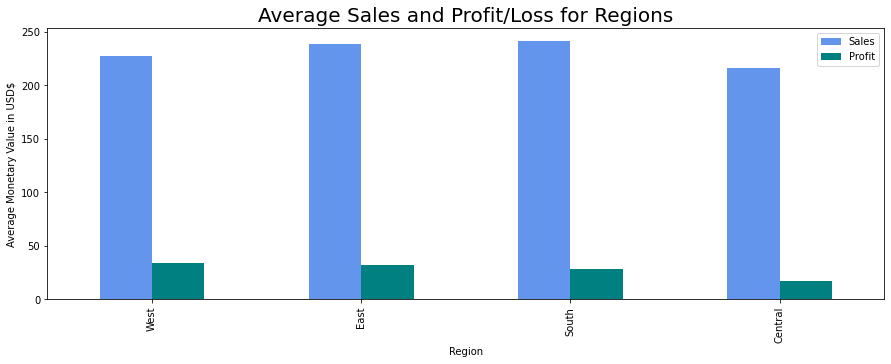

In [50]:
# average Sales and profit/loss for Region
colors = ['Cornflowerblue', 'Teal']
df_region = df.groupby(['Region'])[['Sales', 'Discount', 'Profit']].mean()
df_region.sort_values('Profit', ascending = False)[['Sales', 'Profit']].plot(kind = 'bar',
                                                                             figsize = (15, 5),
                                                                             color = colors)

plt.ylabel('Average Monetary Value in USD$')
plt.xlabel('Region')
plt.title('Average Sales and Profit/Loss for Regions', fontsize = 20)
plt.show()

All regions have similar sales and profit. This is indicative that region has little effect on profits.

For Superstore outlets that are newly opened, marketing strategies should be one of the main focuses to ensure increasing profitable sales and consistent future gains in long term customers.

Moving on to analyse the effect of customer segments on sales and profit :

While the Consumer customer segment made up almost 51% of total sales, the profits contributed was only 47%. This is indicative that although there is good targeting strategy, the Superstore is bearing a slight loss in the Consumer segment due to lower profit margins. Superstore is advised to look into the reasons behind this, and take appropriate action such as improving sales service in order to increase profits. This is essential as Consumers are the most important customer segment to Superstore, taking up approximately half of the customer base.

The Corporate and Home Office segments are returning higher profits on sales made. While their joint sales value adds up to around 50%, their joint profits is over 53%. This is indicative that Superstore is conducting good target strategy with these segments at appropriate profit margins.

Diving deeper into product Categories and Sub-Categories, the spreads and trends of prices, quantities, sales, and profits are analysed.

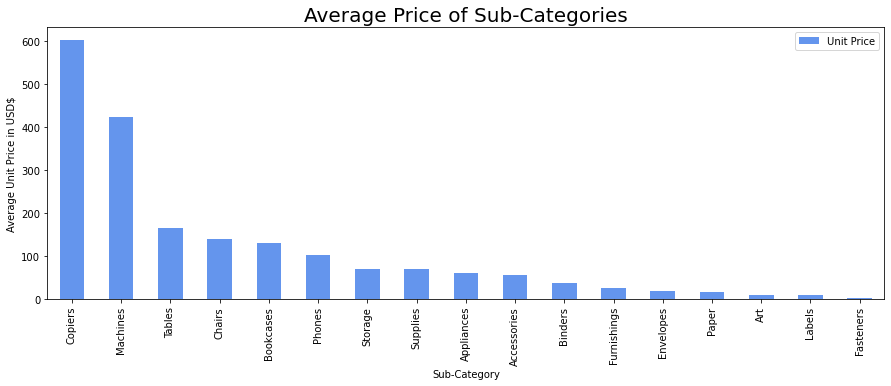

In [51]:
# Unit Price calculation
df['Unit Price'] = df.Sales / df.Quantity

# Unit Profit calculation
df['Unit Profit'] = df.Profit / df.Quantity 

# Unit Price of Sub-Category
df_subcategory = df.groupby(['Sub-Category'])[['Sales', 'Discount', 'Profit', 'Unit Price', 'Unit Profit']].mean()
df_subcategory.sort_values('Unit Price', ascending = False)[['Unit Price']].plot(kind = 'bar',
                                                                                 figsize = (15, 5),
                                                                                 color = 'Cornflowerblue')
plt.ylabel('Average Unit Price in USD$')
plt.xlabel('Sub-Category')
plt.title('Average Price of Sub-Categories', fontsize = 20)
plt.show()


Copiers and Machines are significantly more expensive than all the other products offered. These require more expensive components and expertise for the manufacturing process.

Observations for each product category :

1) Furnitures

Tables, chairs, and bookcases are the more expensive Furniture costing between USD$100 and USD\$150.

Furnishings are the least expensive at around USD$25.

2) Office Supplies

Storage and supplies are the most expensive sub-categories of around USD$75.

Fasteners are the least expensive at less than USD$10.

Office Supplies is the obvious least expensive category. Most of these are small in size, and have wide availability at many other stores.

3) Technology

With the machines and copiers sub-categories being the notably most expensive products, Technology is the obvious most expensive Category. These require more expensive components and expertise for the manufacturing process.

The least expensive is Accessories at almost USD$75.

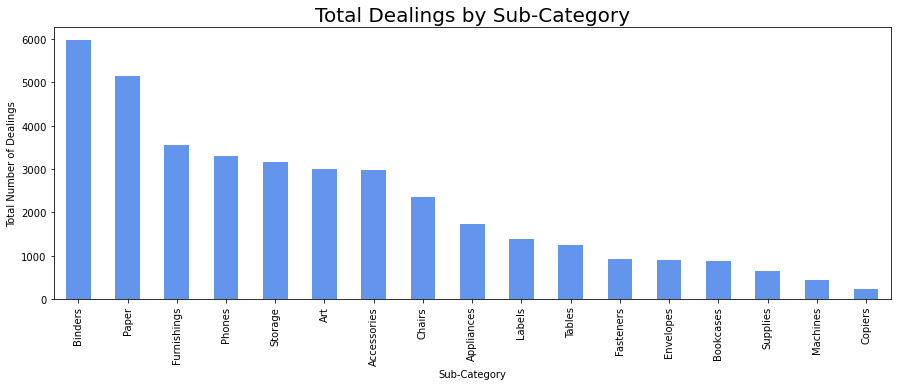

In [52]:
# total dealings for each Sub-Category
df_state_dealings = df.groupby('Sub-Category')['Quantity'].sum().sort_values(ascending = False).plot.bar(figsize = (15, 5), 
                                                                                                        color = 'Cornflowerblue')
plt.ylabel('Total Number of Dealings')
plt.xlabel('Sub-Category')
plt.title('Total Dealings by Sub-Category', fontsize = 20)
plt.show()

Binders and Paper are significantly more popular than the other products offered, with over 5k sales each. This may be because they cost less and are used up faster than the other products, and therefore have higher demands.

Observations for each product category :

1) Furnitures

Furnishings are the most popular Furniture with around 3.5k total sales.

Bookcases are the least popular with only 1k total sales.

2) Office Supplies

Binders are the most popular at almost 6k total sales.

Supplies are the least popular with less than 750 total sales.

Office Supplies is the obvious most popular category. This may be because they cost less and are used up faster than the other products, and therefore have higher demands.

3) Technology

With the Machines and Copiers being the notably least popular products with a combined total sales of less than 1k, and Phones and Accessories having moderate sales of around 3k each, Technology is the obvious least popular Category. This may be because it is the most expensive Category, as more expensive components and expertise are required for the manufacturing process.

The most popular is Phones at over 3.25k total sales.

The least popular is Copiers with less than 250 total sales. This may be because they are significantly more expensive than all the other products offered.

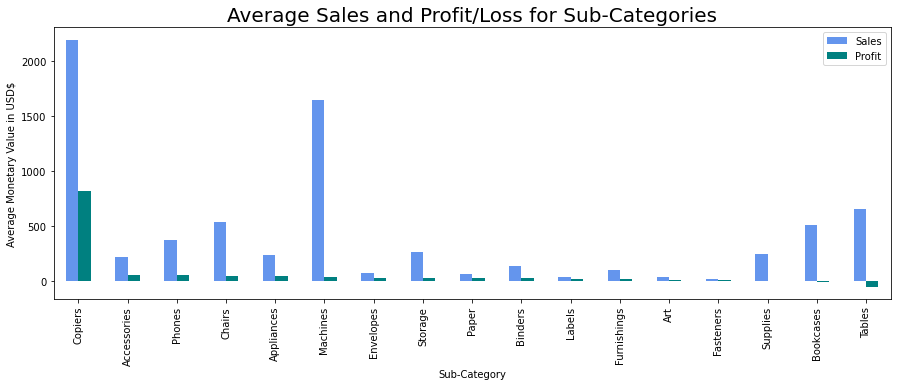

In [53]:
colors = ['Cornflowerblue', 'Teal']
# Average Sales and profit/loss for Sub-Category
df_subcategory.sort_values('Profit', ascending = False)[['Sales', 'Profit']].plot(kind = 'bar',
                                                                                  figsize = (15, 5),
                                                                                  color = colors)

plt.ylabel('Average Monetary Value in USD$')
plt.xlabel('Sub-Category')
plt.title('Average Sales and Profit/Loss for Sub-Categories', fontsize = 20)
plt.show()


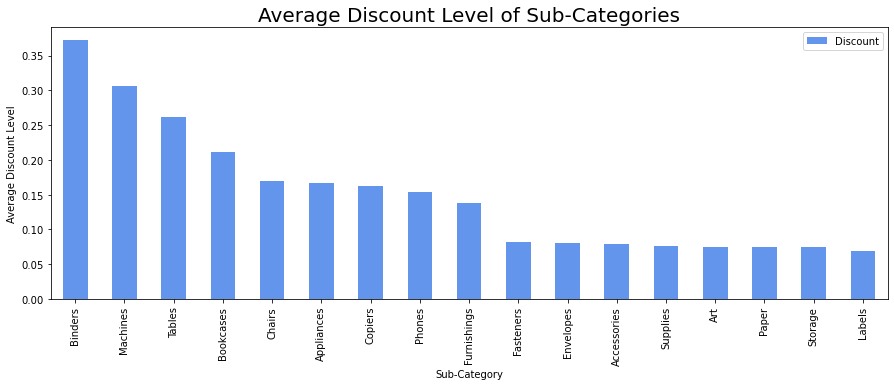

In [54]:
# Discount of Sub-Category
df_subcategory.sort_values('Discount', ascending = False)[['Discount']].plot(kind = 'bar',
                                                                             figsize = (15, 5),
                                                                             color = 'Cornflowerblue')
plt.ylabel('Average Discount Level')
plt.xlabel('Sub-Category')
plt.title('Average Discount Level of Sub-Categories', fontsize = 20)
plt.show()

Observations for each product category :

1) Furnitures

Tables suffer the most losses, despite its highest sales. This may be because it offers the third highest average discount of above 25%.

Bookcases are also loss-bearing despite its high sales. This may be because it offers the fourth highest average discount of above 20%.

The overall performance of Chairs is observed to generate the highest profits from its high sales, despite giving out relatively high average discounts of almost 17.5%.

Furnitures category has the highest average discounts, which lowers its profitability in terms of both profits and profit margins.

2) Office Supplies

Binders have the highest average discounts of around 37.5%, which lowers its profitability in terms of both profits and profit margins.

Overall, all sub-categories have good profit margins.

The reason behind the previous point may be because most sub-categories have an average discount of under 10%. The Office Supplies Category has the lowest discounts.

This Category has the highest profitability in terms of profit margins, which is likely due to low average discounts.

3) Technology

Machine has the lowest profit margin as its notably high sales only bring in almost negligible profits. This may be because it has the second highest average discounts at 30%

Copiers have the highest sales and profit value. This may be because it offers low average discounts of 17.5% on average.

Phone and Accessories have high profits despite lower sales, as compared to similar profits gained from Chairs, Appliances, and Machines. Profit margins are good.

This Category has the highest overall sales and profits.

While the above plots provides detailed information on the profitability of different sub-categories, another more general analysis on the overall categories can offer a clearer look at the performance of each category, as previously analysed.

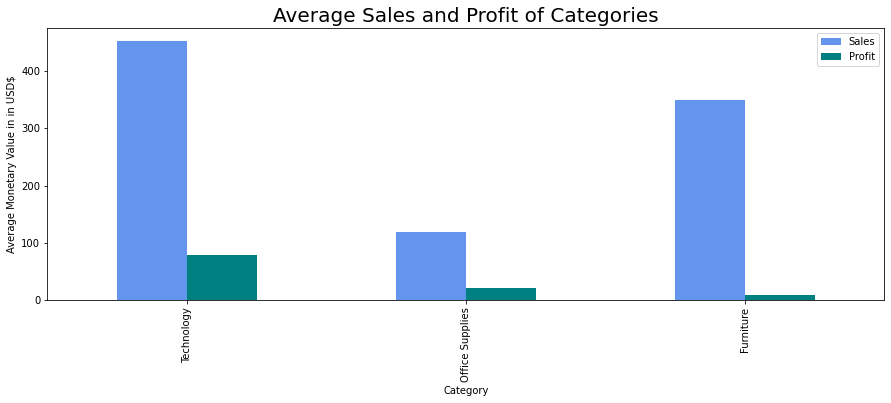

In [55]:
# average Sales and Profit of Category
df_category = df.groupby(['Category'])[['Sales', 'Discount', 'Profit', 'Unit Price', 'Unit Profit']].mean()
df_category.sort_values('Profit', ascending = False)[["Sales", "Profit"]].plot(kind = 'bar',
                                                                               figsize = (15, 5),
                                                                               color = colors)

plt.ylabel('Average Monetary Value in in USD$')
plt.xlabel('Category')
plt.title('Average Sales and Profit of Categories', fontsize = 20)
plt.show()

The Technology business is the obvious most popular category, as well as makes the most profits. With emerging trends towards newer technologies, this business is a fast growing and rapidly advancing area for the near future.

Office Supplies is most profitable in terms of profit margin. Superstore is advised to improve on its notably low sales, such as through marketing strategies, in order to increase profits.

Furniture is considerably popular, but both profits and profit margin are dangerously low. This may be due to more expensive shipping costs as Furnitures are the most heavy and bulky products offered.

Moving on to the effect of shipping modes on sales and profits :

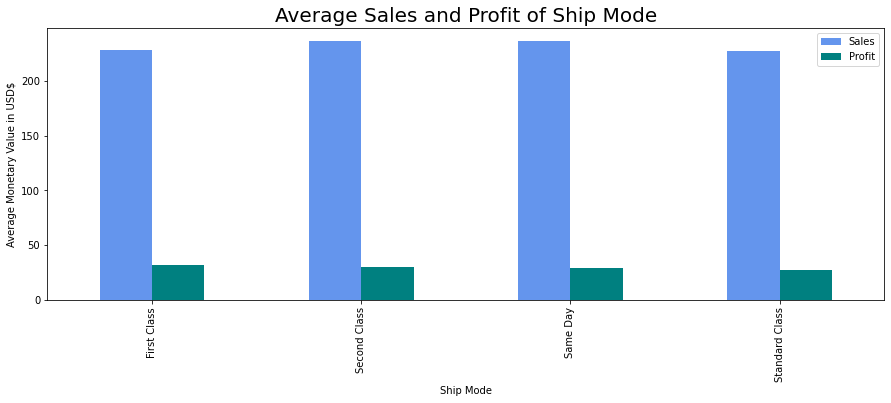

In [59]:
# average Sales and Profit of Ship Mode
df_ship = df.groupby(['Ship Mode'])[['Sales', 'Discount', 'Profit', 'Unit Price', 'Unit Profit']].mean()
df_ship.sort_values('Profit', ascending = False)[["Sales", "Profit"]].plot(kind = 'bar',
                                                                           figsize = (15, 5),
                                                                           color = colors)
plt.ylabel('Average Monetary Value in USD$')
plt.xlabel('Ship Mode')
plt.title('Average Sales and Profit of Ship Mode', fontsize = 20)
plt.show()

ll ship modes have similar sales and profit. This is indicative that ship mode has little effect on profits.

The final EDA will observe the effect of discounts on profit/loss.

C:\Users\Pavan kumar C N\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


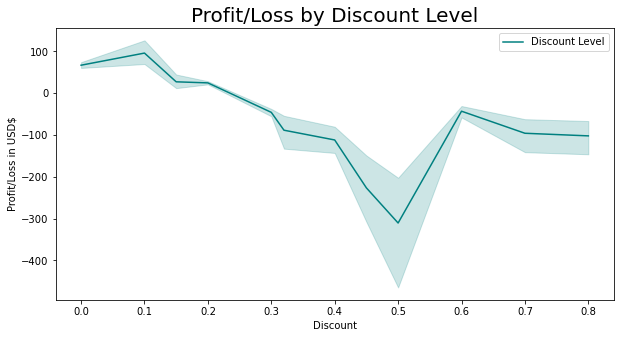

In [57]:
plt.figure(figsize = (10, 5))
# profit/loss by Discount level
sns.lineplot('Discount', 'Profit', data = df, color = 'Teal', label = 'Discount Level')
plt.ylabel('Profit/Loss in USD$')
plt.title('Profit/Loss by Discount Level', fontsize = 20)
plt.show()

Losses will likely occur for higher discount levels above 20%. In other words, between 0% and 20% of discounts, a profit can be made by reducing the occurences of lowered prices after discount deductions. As discussed before, higher discounts likely also encouraged bad consumer psychology, instead of targeting to implement discounts as a promotional strategy to successfully increase sales. A considerable number of customers may develop the thinking that Superstore's products are defective or low quality. In a long run, this can negatively affect Superstore's brand image. All in all, Superstore is advised to consider other promotional strategies.

The worst losses occured when discount approximates 50%. This may indicate festivals, end-of-season sales, and clearance sales for older designs.

Superstore is most profitable when discount levels lower than 10% are offered. This allows less occurences of lowered prices after discount deductions, and thus larger profit margins and profits.

Comparing discounted and non-discounted transactions and their average and total value :

In [58]:
# transactions with Discount
df_discounted = df[df['Discount'] > 0]

# transactions without Discount
df_no_discount = df[df['Discount'] == 0]

print ("On Average :")

print("Discounted Sales per transaction is USD$", round(df_discounted['Sales'].mean(), 2), 
      ", without is USD$", round(df_no_discount['Sales'].mean(), 2))

print("Discounted Unit Price is USD$", round(df_discounted['Unit Price'].mean(), 2), 
      ", without is USD$", round(df_no_discount['Unit Price'].mean(), 2))

print("Discounted Quantity purchased per transaction is ", round(df_discounted['Quantity'].mean(), 2), 
      ", without is ", round(df_no_discount['Quantity'].mean(), 2))

print("Discounted Profit per transaction is USD$", round(df_discounted['Profit'].mean(), 2), 
      ", without is USD$", round(df_no_discount['Profit'].mean(), 2))

print("Discounted Unit Profit is USD$", round(df_discounted['Unit Profit'].mean(), 2), 
      ", without is USD$", round(df_no_discount['Unit Profit'].mean(), 2))

print(" ")

print ("In Total :")

print("Discounted Total Sales is USD$", round(df_discounted['Sales'].sum(), 2), 
      ", without is USD$", round(df_no_discount['Sales'].sum(), 2))

print("Discounted Total Quantity is ", round(df_discounted['Quantity'].sum(), 2), 
      ", without is ", round(df_no_discount['Quantity'].sum(), 2))

print("Discounted Total Profit is USD$", round(df_discounted['Profit'].sum(), 2), 
      ", without is USD$", round(df_no_discount['Profit'].sum(), 2))

On Average :
Discounted Sales per transaction is USD$ 232.93 , without is USD$ 227.13
Discounted Unit Price is USD$ 62.82 , without is USD$ 59.0
Discounted Quantity purchased per transaction is  3.77 , without is  3.81
Discounted Profit per transaction is USD$ -6.67 , without is USD$ 67.02
Discounted Unit Profit is USD$ -1.23 , without is USD$ 17.61
 
In Total :
Discounted Total Sales is USD$ 1208918.03 , without is USD$ 1087277.56
Discounted Total Quantity is  19590 , without is  18230
Discounted Total Profit is USD$ -34602.98 , without is USD$ 320844.41


Considering both average and total sales, customers tend to spend more when there are discounts. An average sales transaction with discounted products is USD$233 as compared to a lower USD\$227 where there are no discounts. In total, the difference amounts to a notable USD$200k increase in sales value when there are discounts.

The average price of a discounted product is USD$63 as compared to USD\$59 for a non-discounted product. This is indicative that discounts are offered on more expensive products to promote affordability.

Considering both average and total sales quantities, customers tend to buy more products when there are discounts. Although the average quantity in a sales transaction that includes discounted products is 3.77 as compared to a higher 3.81 where there are no discounts, the total difference amounts to a notable 1.3k of additional products sold when there are discounts.

However, discounts will affect profits. On average, the sale of a discounted product results in a loss of USD$1 as compared to a USD\$18 gain in profits for a non-discounted product, and a sales transaction that includes discounted products will result in a loss of USD$7 as compared to a USD\$67 gain in profits where there are no disounts. In total, losses amount to USD$35k when there are discounts, as compared to a profit of USD\$321K when there are no discounts. Despite this, the Superstore cannont escape from giving out discounts on their products, especially during festivals, end-of-season sales, and clearance sales that are necessary to make space in their warehouses for newer and more current stocks. Instead, Superstore is advised to reduce overall discount levels to minimise losses, and focus on implementing other promotional strategies to ensure increasing profitable sales and consistent future gains in long term customers.

Thank you!